In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class_dir = '/Users/Bella/Desktop/info-3600/'
nt_dir = class_dir + 'novel-technologies/'

# Load psychiatric_diagnosis_processed.csv
dx_label_data = pd.read_csv(class_dir + 'psychiatric_diagnosis_processed.csv')

# Load heart rate data
fitbit_data_physical_daily = pd.read_csv(nt_dir + 'nt_y_fitb_act_d.csv')  # Fitbit — Physical Activity (Daily)
# fitbit_data7 = pd.read_csv(f"{data_dir}novel-technologies/nt_y_fitb_slp_d.csv") # Fitbit — Sleep (Daily)
# fitbit_covid = pd.read_csv(class_dir + 'cvd_y_fitb_act_d.csv')  # Fitbit -- COVID-19 Actigraphy Substudy

Number of subjects in dx label dataset: 11860
Number of subjects in merged dx/fitbit dataset: 7981


In [ ]:
# Drop NaNs in label dataset
dx_label_data = dx_label_data.dropna()

# Merge diagnosis labels dataset with fitbit daily physical activity data by subject and event marker
all_data = dx_label_data.merge(fitbit_data_physical_daily, on=['src_subject_id', 'eventname'], how='inner')

# Number of subjects in each dataset
print(f'Number of subjects in dx label dataset: {dx_label_data['src_subject_id'].nunique()}')
print(f'Number of subjects in merged dx/fitbit dataset: {all_data['src_subject_id'].nunique()}')

### Plot Diagnosis Labels Data Distibution by Time Point

In [13]:
# Melt psych label dataframe for plotting
dx_label_data_melted = dx_label_data.melt(id_vars=['src_subject_id', 'eventname'], 
                    value_vars=[
                        'parent_report_si_dx', 'parent_report_sa_dx', 'parent_report_mood_dx',
                        'parent_report_psychotic_dx', 'parent_report_anxiety_dx', 'parent_report_elimination_dx',
                        'parent_report_eating_dx', 'parent_report_adhd_dx', 'parent_report_autism_dx',
                        'parent_report_disruptive_dx', 'parent_report_tic_dx', 'parent_report_sud_dx',
                        'parent_report_ptsd_dx', 'parent_report_sleep_dx', 'parent_report_homicide_dx'
                    ], 
                    var_name='diagnosis', value_name='diagnosis_value')

# Rename columns for plotting aesthetics
dx_label_data_melted['eventname'] = dx_label_data_melted['eventname'].str.replace('_year_follow_up_y_arm_1', '-year follow-up')
dx_label_data_melted['eventname'] = dx_label_data_melted['eventname'].str.replace('baseline_year_1_arm_1', 'baseline')
dx_label_data_melted['diagnosis'] = dx_label_data_melted['diagnosis'].str.replace('parent_report_', '')

dx_label_data_melted

,src_subject_id,eventname,diagnosis,diagnosis_value
0,NDAR_INV003RTV85,baseline,si_dx,0
1,NDAR_INV005V6D2C,baseline,si_dx,0
2,NDAR_INV007W6H7B,baseline,si_dx,0
3,NDAR_INV00BD7VDC,baseline,si_dx,0
4,NDAR_INV00CY2MDM,baseline,si_dx,1
...,...,...,...,...
730345,NDAR_INVZZNX6W2P,4-year follow-up,homicide_dx,0
730346,NDAR_INVZZPKBDAC,4-year follow-up,homicide_dx,0
730347,NDAR_INVZZZ2ALR6,4-year follow-up,homicide_dx,0
730348,NDAR_INVZZZNB0XC,4-year follow-up,homicide_dx,0


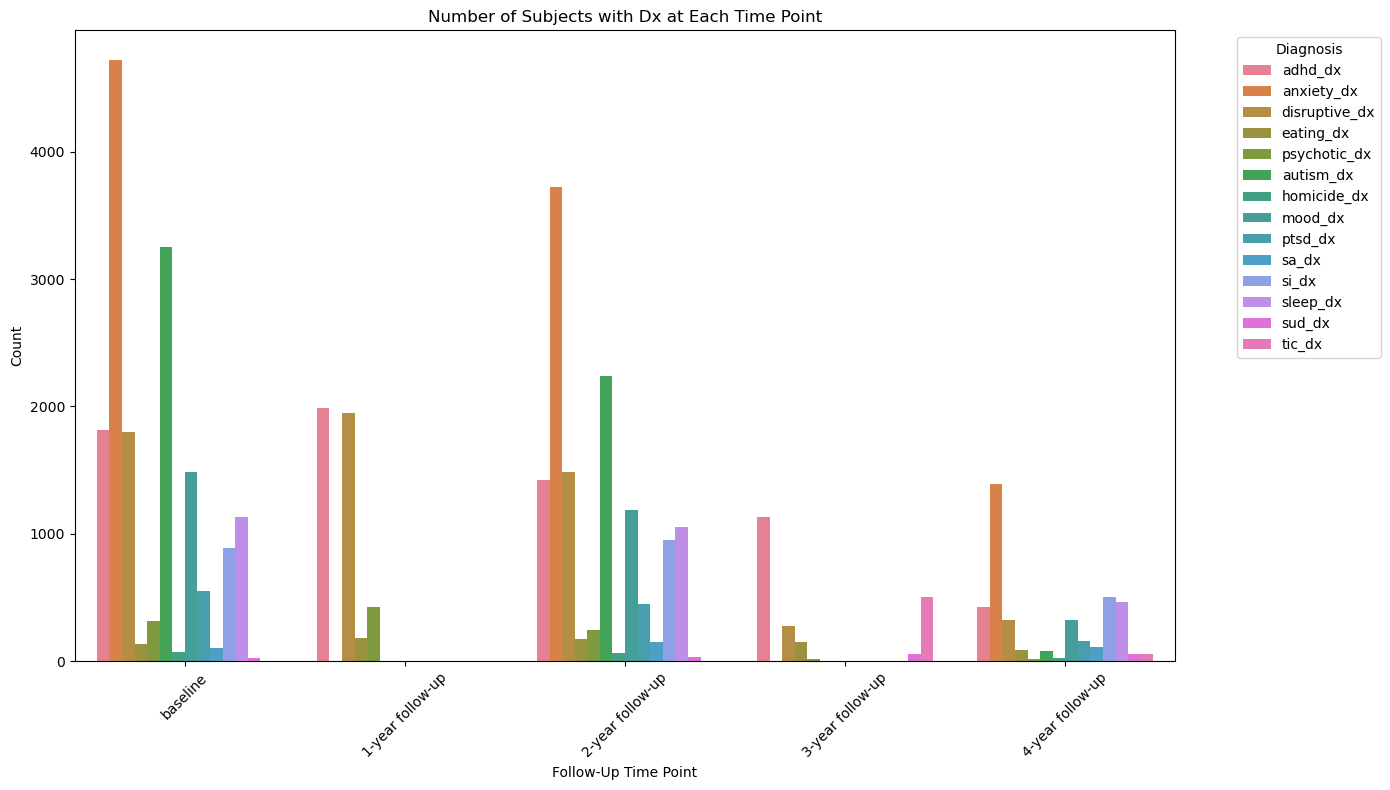

In [17]:
# Group by eventname and diagnosis to get counts
dx_counts = dx_label_data_melted.groupby(['eventname', 'diagnosis', 'diagnosis_value']).size().reset_index(name='count')

# Filter for diagnosis_value == 1 (subjects with diagnosis)
dx_counts_yes = dx_counts[dx_counts['diagnosis_value'] == 1]

# Plotting
event_order = ['baseline'] + [event for event in dx_label_data_melted['eventname'].unique() if event != 'baseline']  # Order xlabels so baseline category is plotted first
plt.figure(figsize=(14, 8))
sns.barplot(data=dx_counts_yes, x='eventname', y='count', hue='diagnosis', order=event_order)
plt.title('Number of Subjects with Dx at Each Time Point')
plt.xlabel('Follow-Up Time Point')
plt.ylabel('Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{class_dir}all_diagnosis_counts.png', dpi=150)

#### Greatest number of points at baseline and 2-year follow-up. Most common dx is anxiety, followed by autism

### Plot Fitbit + Dx Data Distribution

In [4]:
# Melt dataframe for plotting
all_data_melted = all_data.melt(id_vars=['src_subject_id', 'eventname'], 
                    value_vars=[
                        'parent_report_si_dx', 'parent_report_sa_dx', 'parent_report_mood_dx',
                        'parent_report_psychotic_dx', 'parent_report_anxiety_dx', 'parent_report_elimination_dx',
                        'parent_report_eating_dx', 'parent_report_adhd_dx', 'parent_report_autism_dx',
                        'parent_report_disruptive_dx', 'parent_report_tic_dx', 'parent_report_sud_dx',
                        'parent_report_ptsd_dx', 'parent_report_sleep_dx', 'parent_report_homicide_dx'
                    ], 
                    var_name='diagnosis', value_name='diagnosis_value')
# Rename df_dx columns for plotting aesthetics
all_data_melted['eventname'] = all_data_melted['eventname'].str.replace('_year_follow_up_y_arm_1', '-year follow-up')
all_data_melted['eventname'] = all_data_melted['eventname'].str.replace('baseline_year_1_arm_1', 'baseline')
all_data_melted['diagnosis'] = all_data_melted['diagnosis'].str.replace('parent_report_', '')
all_data_melted

,src_subject_id,eventname,diagnosis,diagnosis_value
0,NDAR_INV05LGG3GZ,baseline_year_1_arm_1,parent_report_si_dx,0
1,NDAR_INV05LGG3GZ,baseline_year_1_arm_1,parent_report_si_dx,0
2,NDAR_INV05LGG3GZ,baseline_year_1_arm_1,parent_report_si_dx,0
3,NDAR_INV05LGG3GZ,baseline_year_1_arm_1,parent_report_si_dx,0
4,NDAR_INV05LGG3GZ,baseline_year_1_arm_1,parent_report_si_dx,0
...,...,...,...,...
3358825,NDAR_INVZZZP87KR,4_year_follow_up_y_arm_1,parent_report_homicide_dx,0
3358826,NDAR_INVZZZP87KR,4_year_follow_up_y_arm_1,parent_report_homicide_dx,0
3358827,NDAR_INVZZZP87KR,4_year_follow_up_y_arm_1,parent_report_homicide_dx,0
3358828,NDAR_INVZZZP87KR,4_year_follow_up_y_arm_1,parent_report_homicide_dx,0


In [8]:
all_data_melted['eventname'].unique()

array(['baseline', '2-year follow-up', '4-year follow-up'], dtype=object)

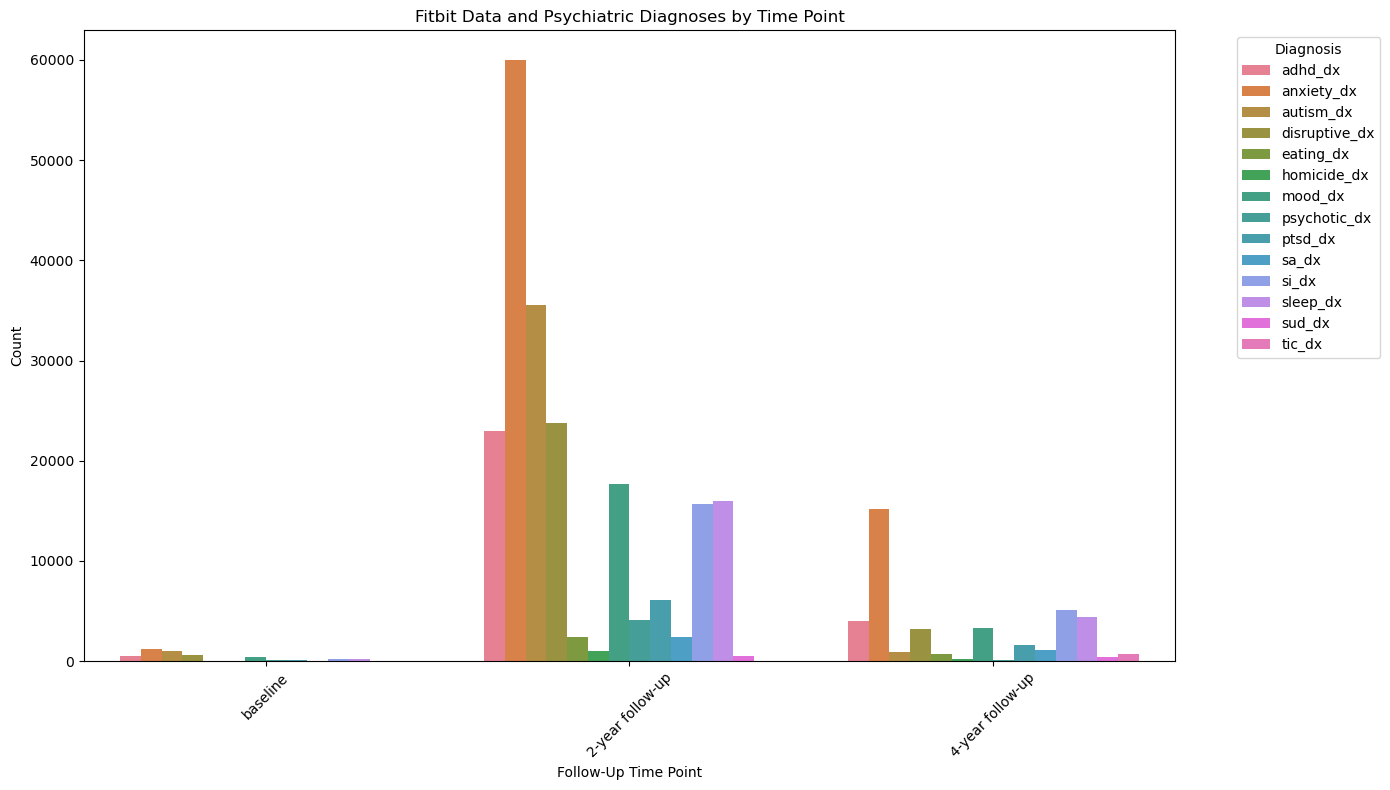

In [16]:
# Group by eventname and diagnosis to get counts
diagnosis_counts = all_data_melted.groupby(['eventname', 'diagnosis', 'diagnosis_value']).size().reset_index(name='count')

# Filter for diagnosis_value == 1 (subjects with diagnosis)
diagnosis_counts_yes = diagnosis_counts[diagnosis_counts['diagnosis_value'] == 1]

# Plotting
event_order = ['baseline'] + [event for event in all_data_melted['eventname'].unique() if event != 'baseline']  # Order xlabels so baseline category is plotted first
plt.figure(figsize=(14, 8))
sns.barplot(data=diagnosis_counts_yes, x='eventname', y='count', hue='diagnosis', order=event_order)
plt.title('Fitbit Data and Psychiatric Diagnoses by Time Point')
plt.xlabel('Follow-Up Time Point')
plt.ylabel('Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{class_dir}fitbit_diagnosis_counts.png', dpi=150)

#### Fitbit data is concentrated at the 2-year follow-up time point

### Plot Participant Demographics

### Explore COVID HR dataset (probably won't use)

In [ ]:
df_hr = df_cvd_hr.drop('eventname', axis=1)
df_cvd_hr

In [ ]:
# Verify number of subjects in HR data
# Each subject has a variable number of entries (one row per day of Fitbit wear)
print(f'Number of subjects in CVD HR data: {df_hr['src_subject_id'].nunique()}, Total number of observations: {df_cvd_hr['src_subject_id'].count()}')

In [ ]:
# Resting heart rate could be an interesting dependent variable to explore
df_hr['cvd_fit_ss_fitbit_restingheartrate'].count()

In [ ]:
# Filter df_dx to include only subjects found in df_hr
# Check that # of subjects in filtered dataset matches # in HR dataset
df_dx_subset = df_dx[df_dx['src_subject_id'].isin(df_nt_hr['src_subject_id'])]
print(f'Number of subjects in filtered dataset: {df_dx_subset['src_subject_id'].nunique()}, Total number of observations: {len(df_dx_subset)}')

In [ ]:
df_dx_subset

In [ ]:
# Plot filtered dataset
df_dx_subset_melted = df_dx_subset.melt(id_vars=['src_subject_id', 'eventname'], 
                    value_vars=[
                        'si_dx', 'sa_dx', 'mood_dx',
                        'psychotic_dx', 'anxiety_dx', 'elimination_dx',
                        'eating_dx', 'adhd_dx', 'autism_dx',
                        'disruptive_dx', 'tic_dx', 'sud_dx',
                        'ptsd_dx', 'sleep_dx', 'homicide_dx'
                    ], 
                    var_name='diagnosis', value_name='diagnosis_value')
diagnosis_counts = df_dx_subset_melted.groupby(['eventname', 'diagnosis', 'diagnosis_value']).size().reset_index(name='count')
diagnosis_counts_yes = diagnosis_counts[diagnosis_counts['diagnosis_value'] == 1]

# Plot with specified xlabel order, fig size
event_order = ['baseline'] + [event for event in df_dx['eventname'].unique() if event != 'baseline']
plt.figure(figsize=(14, 8))
sns.barplot(data=diagnosis_counts_yes, x='eventname', y='count', hue='diagnosis', order=event_order)
plt.title('Number of Subjects Surveyed at Each Time Point')
plt.xlabel('Follow-Up Time Point')
plt.ylabel('Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig(f'{class_dir}/diagnosis_counts_by_subject.png', dpi=200)

In [ ]:
avg_sleep_min = df_hr['cvd_fit_ss_sleep_min'].mean()
avg_sleep_min/60

In [ ]:
avg_restinghr = df_hr['cvd_fit_ss_fitbit_restingheartrate'].mean()
iqr_restinghr = df_hr['cvd_fit_ss_fitbit_restingheartrate'].quantile(q=[0, 0.25, 0.5, 0.75, 1])
avg_restinghr

In [ ]:
iqr_restinghr